# Adaboost Algorithm on Planet Dataset

<b>Load Dataset

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = sns.load_dataset('planets')
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [9]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [13]:
data.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [15]:
data.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


<b>Data clean

In [17]:
data.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [19]:
data.dropna(inplace=True)
data.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [23]:
data.drop_duplicates(inplace=True)

In [25]:
data.duplicated().sum()

0

In [27]:
#assigning x variable data
X =data [['number', 'orbital_period', 'mass', 'distance', 'year']]

X.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [29]:
y = data['method']

y.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: object

<b> Exploratory Data Analysis

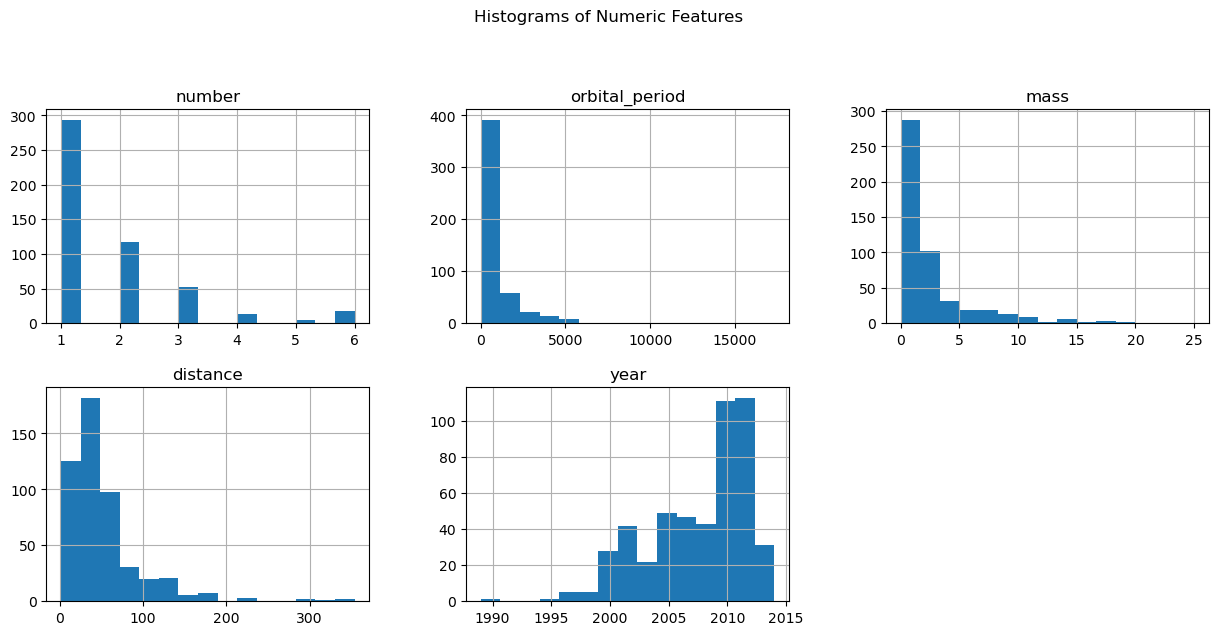

In [33]:
# Plot histograms for numeric features
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()


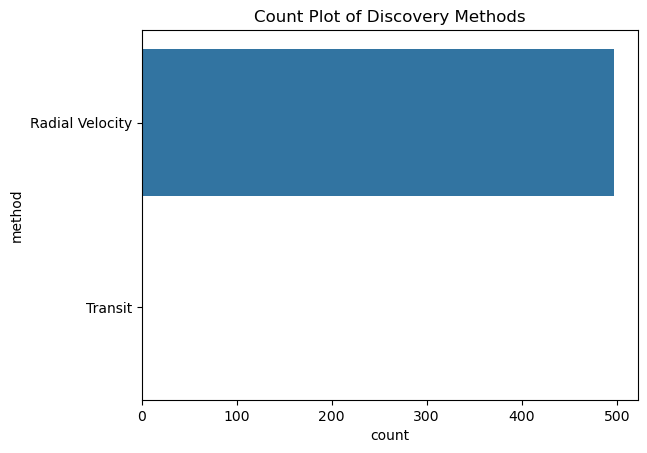

In [41]:
sns.countplot(y='method', data=data, order=data['method'].value_counts().index)
plt.title('Count Plot of Discovery Methods')
plt.show()


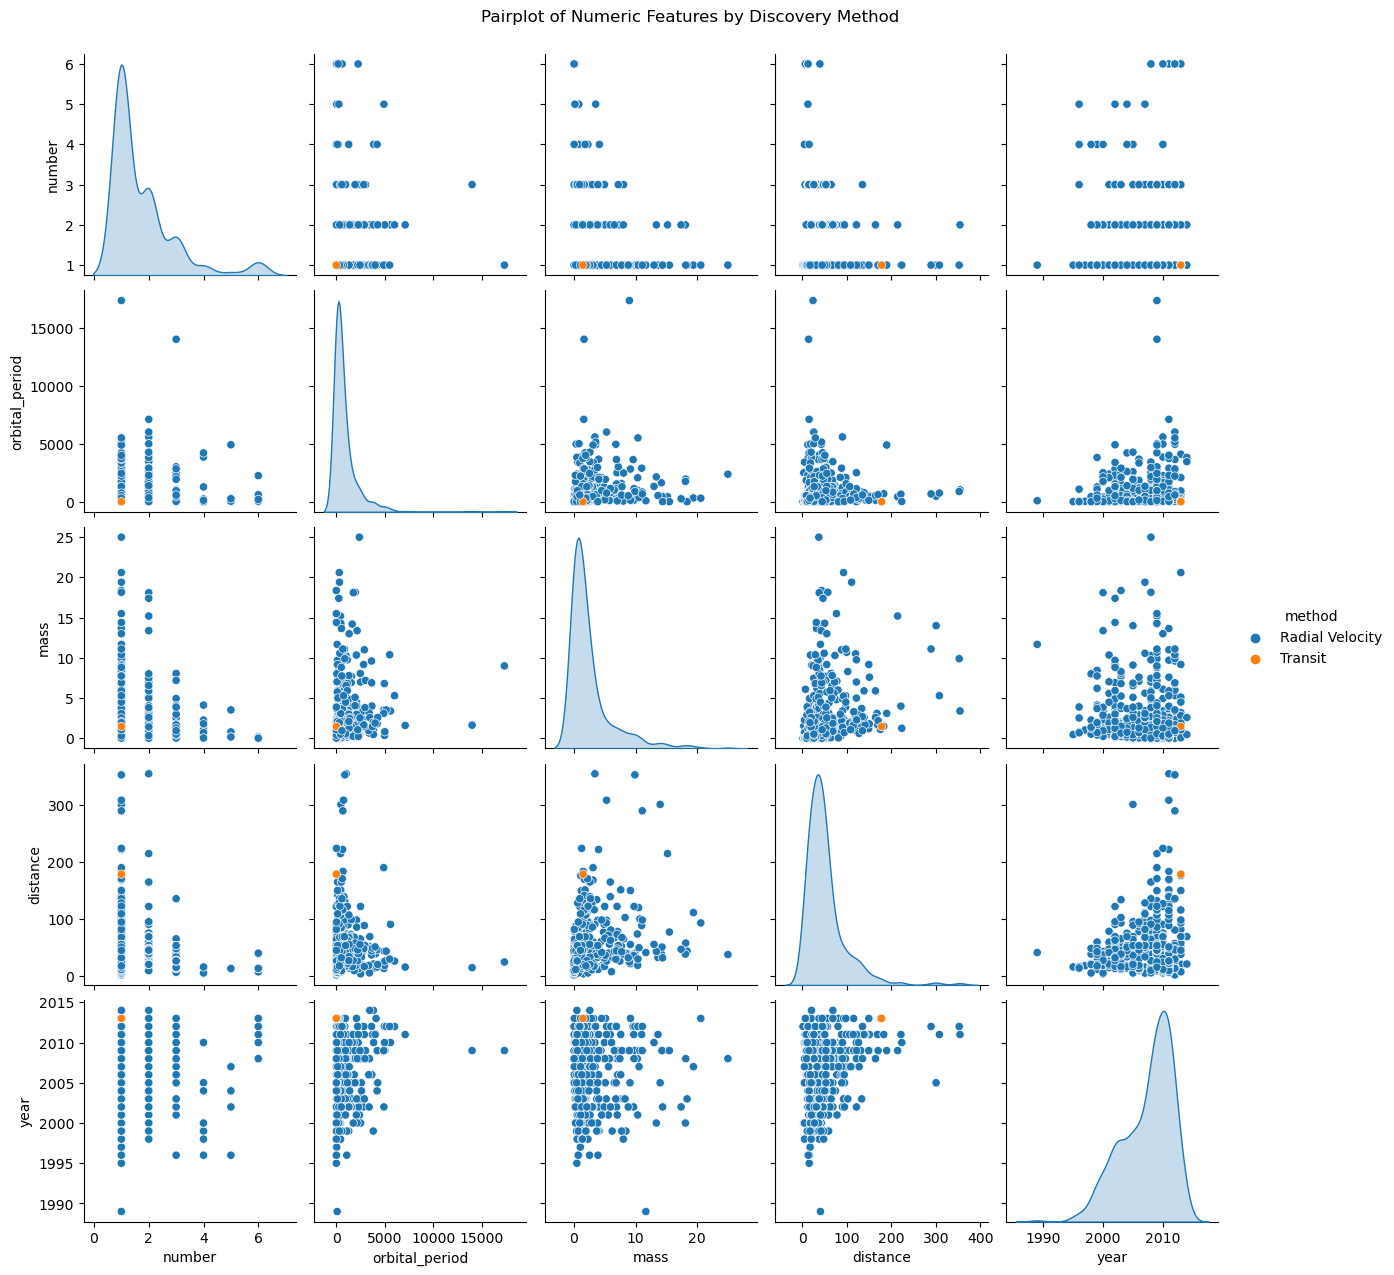

In [43]:
sns.pairplot(data.dropna(), hue='method')
plt.suptitle('Pairplot of Numeric Features by Discovery Method', y=1.02)
plt.show()

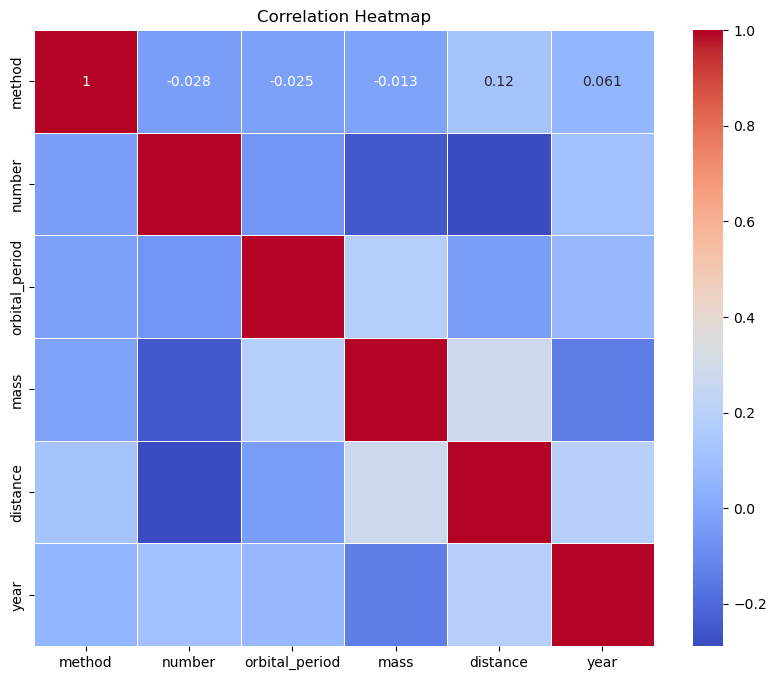

In [49]:
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

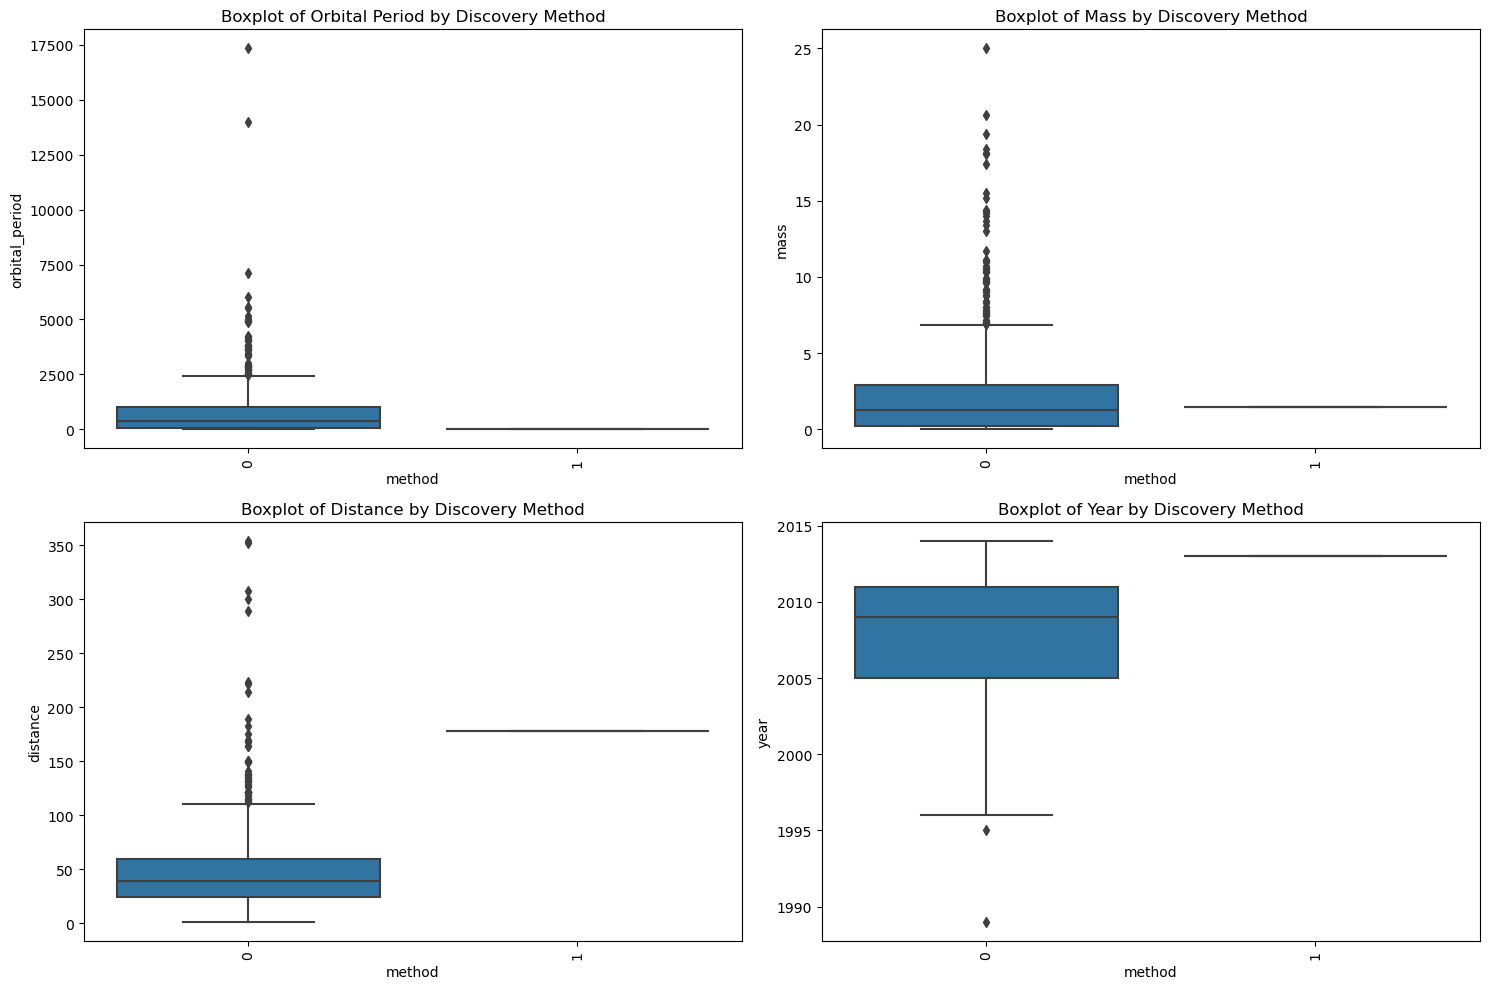

In [51]:
plt.figure(figsize=(15, 10))

# Boxplot for Orbital Period
plt.subplot(2, 2, 1)
sns.boxplot(x='method', y='orbital_period', data=data)
plt.title('Boxplot of Orbital Period by Discovery Method')
plt.xticks(rotation=90)

# Boxplot for Mass
plt.subplot(2, 2, 2)
sns.boxplot(x='method', y='mass', data=data)
plt.title('Boxplot of Mass by Discovery Method')
plt.xticks(rotation=90)

# Boxplot for Distance
plt.subplot(2, 2, 3)
sns.boxplot(x='method', y='distance', data=data)
plt.title('Boxplot of Distance by Discovery Method')
plt.xticks(rotation=90)

# Boxplot for Year
plt.subplot(2, 2, 4)
sns.boxplot(x='method', y='year', data=data)
plt.title('Boxplot of Year by Discovery Method')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<b> Model Evaluation

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

<b> Train-Test Split

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<b> Applying Algorithm

In [17]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

<b> Accuracy Score

In [18]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:\n", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy:
 0.9933333333333333
